<div class="alert alert-block alert-info" style="background-color:#94bbe9; color:black">
    <h1 style="text-align: center;">Introduction to statistical analysis</h1>
    <h2 style="text-align: center;">Election project</h2>
    <h2 style="text-align: center;">19.11.2019</h2>
  
  </div><br>
   <div  style="text-align: justify; background-color:#94bbe9; color:black; padding:10px;">
    First of all, we have data about US presidential election county results from 2004 through 2012. The data is focused on Republican and Democratic parties. So our goal is to specify what counties in what state the Democratic party should focus on and invest in to win the next election.  The first stage will specify what state that it is pure Republican (won in the three years) with the smallest margin with Democratic. The second one is to determine what counties also have the smallest margin, take into consideration the total number of votes in that county.
   

</div>
 



## Importing some libraries 

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from empiricaldist import Pmf
import operator
import matplotlib.pyplot as plt 

## Reading the data and looking at the big picture

In [13]:
data=pd.read_csv('Desktop/us-presidential-election-county-results-2004-through-2012.csv')

In [14]:
data.head()

,year,state,county,fips,vote_rep,vote_dem,vote_oth,vote_total,pct_rep,pct_dem,pct_oth,winner,runnerup,pct_winner,margin_winner_over_runnerup
0,2004,AL,Autauga County,01001,15196,4758,127,20081,75.7,23.7,0.6,rep,dem,75.7,52.0
1,2004,AL,Baldwin County,01003,52971,15599,750,69320,76.4,22.5,1.1,rep,dem,76.4,53.9
2,2004,AL,Barbour County,01005,5899,4832,46,10777,54.7,44.8,0.4,rep,dem,54.7,9.9
3,2004,AL,Bibb County,01007,5472,2089,39,7600,72.0,27.5,0.5,rep,dem,72.0,44.5
4,2004,AL,Blount County,01009,17386,3938,180,21504,80.9,18.3,0.8,rep,dem,80.9,62.6


In [15]:
data.shape

(9461, 15)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9461 entries, 0 to 9460
Data columns (total 15 columns):
year                           9461 non-null int64
state                          9461 non-null object
county                         9461 non-null object
fips                           9461 non-null object
vote_rep                       9461 non-null int64
vote_dem                       9461 non-null int64
vote_oth                       9461 non-null int64
vote_total                     9461 non-null int64
pct_rep                        9461 non-null float64
pct_dem                        9461 non-null float64
pct_oth                        9461 non-null float64
winner                         9461 non-null object
runnerup                       9461 non-null object
pct_winner                     9461 non-null float64
margin_winner_over_runnerup    9461 non-null float64
dtypes: float64(5), int64(5), object(5)
memory usage: 1.1+ MB


## Cleaning the data

In [17]:
data.isnull().sum(axis=0)

year                           0
state                          0
county                         0
fips                           0
vote_rep                       0
vote_dem                       0
vote_oth                       0
vote_total                     0
pct_rep                        0
pct_dem                        0
pct_oth                        0
winner                         0
runnerup                       0
pct_winner                     0
margin_winner_over_runnerup    0
dtype: int64

<div class="alert alert-block alert-info">
There are no null values
</div>

In [18]:
data.describe()

,year,vote_rep,vote_dem,vote_oth,vote_total,pct_rep,pct_dem,pct_oth,pct_winner,margin_winner_over_runnerup
count,9461.000000,9.461000e+03,9.461000e+03,9461.000000,9.461000e+03,9461.000000,9461.000000,9461.000000,9461.000000,9461.000000
mean,2007.999577,1.934384e+04,2.056118e+04,549.253356,4.047413e+04,56.767459,37.481014,-0.609479,61.065685,27.881161
std,3.266073,4.547357e+04,7.204556e+04,1834.700359,1.153066e+05,146.879361,146.599026,145.396975,146.597607,18.883382
min,2004.000000,-9.999000e+03,-9.999000e+03,-9999.000000,-9.999000e+03,-9999.000000,-9999.000000,-9999.000000,-9999.000000,0.000000
25%,2004.000000,2.928000e+03,1.730000e+03,55.000000,4.955000e+03,50.150000,29.730000,0.800000,55.310000,12.200000
50%,2008.000000,6.333000e+03,4.165000e+03,143.000000,1.073800e+04,59.660000,38.800000,1.390000,61.800000,25.160000
75%,2012.000000,1.593700e+04,1.131200e+04,401.000000,2.779800e+04,68.710000,48.300000,2.000000,69.780000,41.000000
max,2012.000000,1.076225e+06,2.295853e+06,78831.000000,3.318248e+06,96.150000,93.390000,34.760000,96.150000,92.850000


<div class="alert alert-block alert-info">
We have some dommy values
</div>

In [19]:
data=data.drop(data.index[3673])
data=data.drop(data.index[519])

In [20]:
data.describe()

,year,vote_rep,vote_dem,vote_oth,vote_total,pct_rep,pct_dem,pct_oth,pct_winner,margin_winner_over_runnerup
count,9459.000000,9.459000e+03,9.459000e+03,9459.000000,9.459000e+03,9459.000000,9459.000000,9459.000000,9459.000000,9459.000000
mean,2008.000000,1.935004e+04,2.056764e+04,551.483666,4.048481e+04,58.893639,39.603116,1.504569,63.192774,27.887056
std,3.266159,4.547637e+04,7.205181e+04,1828.470363,1.153165e+05,13.818724,13.806798,0.983639,9.484931,18.881025
min,2004.000000,5.400000e+01,5.000000e+00,0.000000,6.400000e+01,5.980000,0.550000,0.000000,44.170000,0.000000
25%,2004.000000,2.929500e+03,1.731000e+03,55.000000,4.958000e+03,50.165000,29.735000,0.800000,55.315000,12.200000
50%,2008.000000,6.333000e+03,4.170000e+03,143.000000,1.074100e+04,59.670000,38.800000,1.390000,61.800000,25.170000
75%,2012.000000,1.593900e+04,1.131350e+04,401.500000,2.783250e+04,68.715000,48.300000,2.000000,69.780000,41.010000
max,2012.000000,1.076225e+06,2.295853e+06,78831.000000,3.318248e+06,96.150000,93.390000,34.760000,96.150000,92.850000


<div class="alert alert-block alert-info">
We dropped the rows that have dommy values
</div>

In [21]:
data['year'].value_counts()

2012    3153
2004    3153
2008    3153
Name: year, dtype: int64

<div class="alert alert-block alert-info">
 We have three years to work with
</div>

## Specify the swing states 

#### Slicing the data depending on years

In [22]:
data_2004=data[data.year==2004]
data_2008=data[data.year==2008]
data_2012=data[data.year==2012]

#### Store the state and its count for each year

In [24]:
count_2004=data_2004['state'].value_counts()
count_2008=data_2008['state'].value_counts()
count_2012=data_2012['state'].value_counts()

In [25]:
len(count_2012)

51

In [26]:
len(count_2004)

51

In [27]:
len(count_2008)

51

<div class="alert alert-block alert-info">
For the three years we have the complete number of states (51)
</div>

#### For each state in the three years specify how many county win for the rep and the dem

In [139]:
states_2004_dem={}
states_2004_rep={}
states_2008_dem={}
states_2008_rep={}
states_2012_dem={}
states_2012_rep={}
for i in data_2004.iterrows():
    if i[1][11]=='dem':
        if i[1][1] in states_2004_dem:

            states_2004_dem[i[1][1]]+=1
            
       
        else:

            states_2004_dem[i[1][1]]=1
    else :
        if i[1][1] in states_2004_rep:

            states_2004_rep[i[1][1]]+=1
            
       
        else:

            states_2004_rep[i[1][1]]=1
            
#######################################
for i in data_2008.iterrows():
    if i[1][11]=='dem':
        if i[1][1] in states_2008_dem:

            states_2008_dem[i[1][1]]+=1
            
       
        else:

            states_2008_dem[i[1][1]]=1
    else :
        if i[1][1] in states_2008_rep:

            states_2008_rep[i[1][1]]+=1
            
       
        else:

            states_2008_rep[i[1][1]]=1
            
#####################################

for i in data_2012.iterrows():
    if i[1][11]=='dem':
        if i[1][1] in states_2012_dem:

            states_2012_dem[i[1][1]]+=1
            
       
        else:

            states_2012_dem[i[1][1]]=1
    else :
        if i[1][1] in states_2012_rep:

            states_2012_rep[i[1][1]]+=1
            
       
        else:

            states_2012_rep[i[1][1]]=1



In [140]:
states_2004_dem['AL']

11

In [141]:
states_2004_rep['AL']

56

<div class="alert alert-block alert-info">
For example in the state AL, there are 11 counties the dem win on them and 56 counties the rep win on them. So we can say this state in the 2004 is a rep state
</div>

#### Slicing the names of the states 

In [155]:
names_2004_dem=[i for i in states_2004_dem]
names_2004_rep=[i for i in states_2004_rep]
names_2008_dem=[i for i in states_2008_dem]
names_2008_rep=[i for i in states_2008_rep]
names_2012_dem=[i for i in states_2012_dem]
names_2012_rep=[i for i in states_2012_rep]

In [156]:
names_2004_dem[:4]

['AL', 'AZ', 'AR', 'CA']

#### Specify what states did not have any county that wins for dem or rep, so if a state in 2004 all counties on it win for rep so it is a rep state

In [157]:
rep_win_states_2004=[]
for i in names_2004_rep:
    if i not in names_2004_dem:
       
        rep_win_states_2004.append(i)
        
        
rep_win_states_2008=[]
for i in names_2008_rep:
    if i not in names_2008_dem:
       
        rep_win_states_2008.append(i)
        
rep_win_states_2012=[]
for i in names_2012_rep:
    if i not in names_2012_dem:
       
        rep_win_states_2012.append(i)

In [158]:
dem_win_states_2004=[]
for i in names_2004_dem:
    if i not in names_2004_rep:
       
        dem_win_states_2004.append(i)
        
        
dem_win_states_2008=[]
for i in names_2008_dem:
    if i not in names_2008_rep:
       
        dem_win_states_2008.append(i)
        
dem_win_states_2012=[]
for i in names_2012_dem:
    if i not in names_2012_rep:
       
        dem_win_states_2012.append(i)

In [159]:
dem_win_states_2008

['CT', 'DC', 'HI', 'MA', 'NH', 'RI', 'VT']

<div class="alert alert-block alert-info">
There are some states did not vote for dem and some did not vote for rep. As an example, the state CT has no county winner for rep, so it is a dem state in 2008
</div>




#### Now for states how have some counties winner for rep and for dem, so we will compare the number of counties winner for rep with the ones who win for the dem and specify this state is rep state or dem state

In [160]:
for i in states_2004_dem:
    for t in states_2004_rep:
        if i==t:
            if states_2004_dem[i]>states_2004_rep[t]:
                dem_win_states_2004.append(i)
            else:
                rep_win_states_2004.append(i)
   



for i in states_2008_dem:
    for t in states_2008_rep:
        if i==t:
            if states_2008_dem[i]>states_2008_rep[t]:
                dem_win_states_2008.append(i)
            else:
                rep_win_states_2008.append(i)
   
for i in states_2012_dem:
    for t in states_2012_rep:
        if i==t:
            if states_2012_dem[i]>states_2012_rep[t]:
                dem_win_states_2012.append(i)
            else:
                rep_win_states_2012.append(i)
   

In [161]:
len(dem_win_states_2004)

9

In [162]:
len(rep_win_states_2004)

42

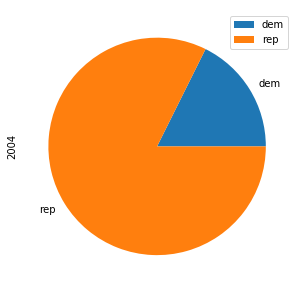

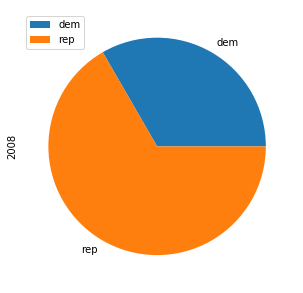

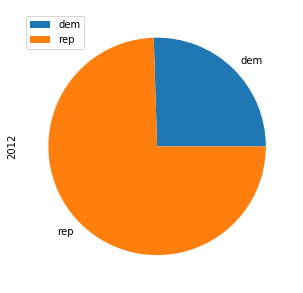

In [780]:
df = pd.DataFrame({'2004': [len(dem_win_states_2004),len(rep_win_states_2004)]},
                  index=['dem','rep'])
df1 = pd.DataFrame({'2008': [len(dem_win_states_2008),len(rep_win_states_2008)]},
                  index=['dem','rep'])
df2 = pd.DataFrame({'2012': [len(dem_win_states_2012),len(rep_win_states_2012)]},
                  index=['dem','rep'])


plot = [df.plot.pie(y='2004', figsize=(5, 5)), df1.plot.pie(y='2008', figsize=(5, 5)),
       df2.plot.pie(y='2012', figsize=(5, 5))]





#### Slicing the names of all states

In [163]:
all_states=[]
for i in data_2004.iterrows():
     if i[1][1] not in all_states:
            all_states.append(i[1][1])
      

In [164]:
len(all_states)

51

#### Deleting all states that win for dem in all years

In [171]:
swing_states=[]
for i in all_states:
    if i in dem_win_states_2004 and i in dem_win_states_2008 and i in dem_win_states_2012:
        print('\0')
    else:
        swing_states.append(i)

 
 
 
 
 
 
 
 
 


In [172]:
len(states_can_be_changed)

42

<div class="alert alert-block alert-info">
The dem did not win in 42 states in 2004 ,2008 and 2012. The number of swing states is 42 state
</div>






#### Divide the swing states to the ones who won for rep in all three years the who did not win for a specific party 

In [178]:
swing_states_rep=[]
for i in swing_states:
    if i in rep_win_states_2004 :
        if i in rep_win_states_2008 :
            if i in rep_win_states_2012:
                swing_states_rep.append(i)

In [179]:
len(swing_states_rep)

34

<div class="alert alert-block alert-info">

The rep win in 34 states in 2004 ,2008 and 2012
</div>







In [187]:
swing_states_no_specific_party=[]
for i in swing_states:
    if i not in swing_states_rep:
        swing_states_no_specific_party.append(i)

In [188]:
len(swing_states_no_specific_party)

8

<div class="alert alert-block alert-info">

There are 8 states who did not have a specific party 
</div>







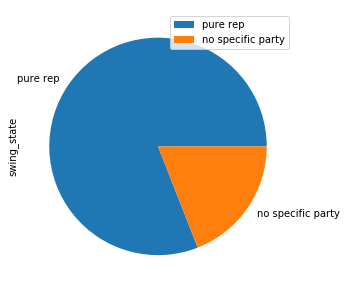

In [782]:
df = pd.DataFrame({'swing_state': [len(swing_states_rep),len(swing_states_no_specific_party)]},
                  index=['pure rep','no specific party'])


plot = df.plot.pie(y='swing_state', figsize=(5, 5))

#### Now we want to find the margin between the rep and the dem in the counties that won for rep in the swing states rep (states won for rep in all three years)(just for the rep counties )

In [193]:
rep_temp={}
for i in swing_states_rep:
    for t in data.iterrows():
        if t[1][1]==i and t[1][11]=='rep':
            if t[1][1] in rep_temp:
                rep_temp[t[1][1]][0].append(t[1][14])
                rep_temp[t[1][1]][1]+=1
            else:
                 rep_temp[t[1][1]]=[[t[1][14]],1]
                
            

In [194]:
len(rep_temp)

34

#### Finding the median of the margin values for each state

In [201]:
import statistics
margin_swing_states_rep={}
for i in rep_temp:
    
    margin_swing_states_rep[i]=(statistics.median(rep_temp[i][0]))

#### Sort the swing state rep depending on the margin value 

In [202]:
margin_swing_states_rep = sorted(margin_swing_states_rep.items(), key=operator.itemgetter(1))

In [203]:
margin_swing_states_rep[0]

('MN', 12.075)

#### A bar plot for swing state rep with their margin values

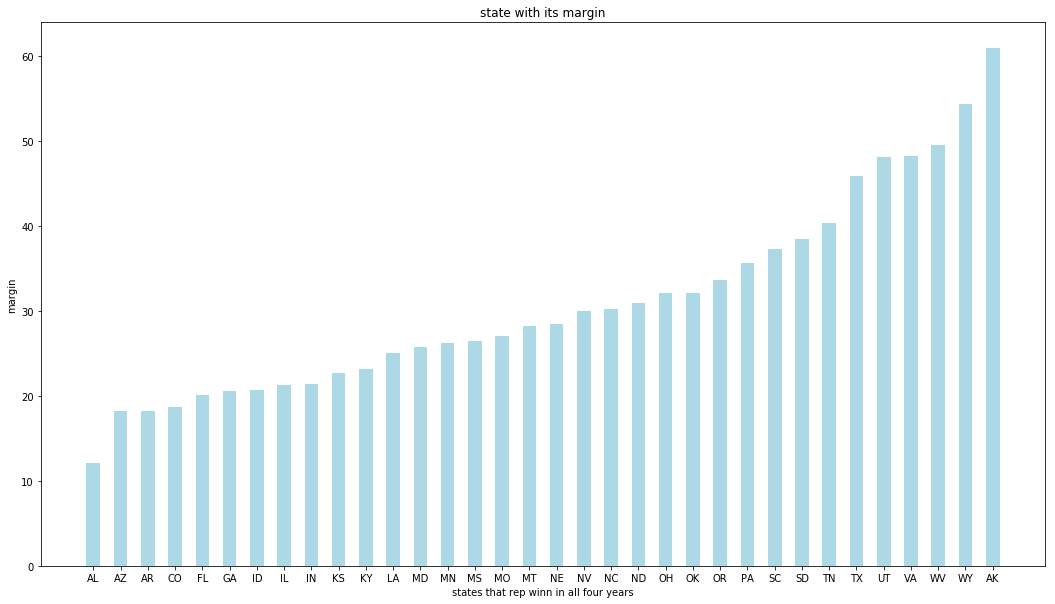

In [209]:


f, ax = plt.subplots(figsize=(18,10))

left = [i+1 for i in range(len(swing_states_rep))]
  

height = [i[1] for i in margin_swing_states_rep] 
  

tick_label =  swing_states_rep
  

plt.bar(left, height, tick_label = tick_label, width = 0.5,color = 'lightblue') 
  

plt.xlabel('states that rep winn in all four years') 

plt.ylabel('margin') 

plt.title('state with its margin') 
  

plt.show() 

<div class="alert alert-block alert-info">
From the graph above we can see that the state AL is a rep swing state with a small margin with dem party. So we can take this in our work
</div>







#### Now we want to find the margin between the rep and the dem in the counties that did not win in a specific party in the three years (just for the rep counties )

In [219]:
rep_temp2={}
for i in swing_states_no_specific_party:
    if i in rep_win_states_2004:
        for t in data_2004.iterrows():
            if t[1][1]==i and t[1][11]=='rep':
                if t[1][1] in rep_temp2:
                    rep_temp2[t[1][1]][0].append(t[1][14])
                    rep_temp2[t[1][1]][1]+=1
                else:
                     rep_temp2[t[1][1]]=[[t[1][14]],1]
    if i in rep_win_states_2008:
        for t in data_2008.iterrows():
            if t[1][1]==i and t[1][11]=='rep':
                if t[1][1] in rep_temp2:
                    rep_temp2[t[1][1]][0].append(t[1][14])
                    rep_temp2[t[1][1]][1]+=1
                else:
                     rep_temp2[t[1][1]]=[[t[1][14]],1]
    if i in rep_win_states_2012:
        for t in data_2012.iterrows():
            if t[1][1]==i and t[1][11]=='rep':
                if t[1][1] in rep_temp2:
                    rep_temp2[t[1][1]][0].append(t[1][14])
                    rep_temp2[t[1][1]][1]+=1
                else:
                     rep_temp2[t[1][1]]=[[t[1][14]],1]

In [220]:
len(rep_temp2)

8

#### Finding the median of the margin values for each state








In [301]:
import statistics
margin_rep_winn_in_diff_years={}
for i in rep_temp2:
    margin_rep_winn_in_diff_years[i]=(statistics.median(rep_temp2[i][0]))

#### Sort the swing state rep depending on the margin value 

In [302]:
margin_rep_winn_in_diff_years = sorted(margin_rep_winn_in_diff_years.items(), key=operator.itemgetter(1))

#### A bar plot for swing state rep with their margin values

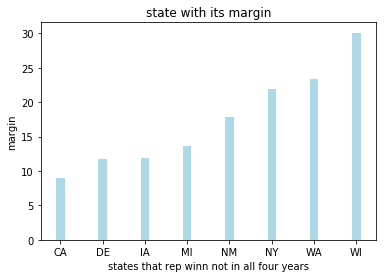

In [303]:
import matplotlib.pyplot as plt 



left1 = [i+1 for i in range(len(swing_states_no_specific_party))]
  

height1 = [i[1] for i in margin_rep_winn_in_diff_years] 
  

tick_label1 =  swing_states_no_specific_party
  

plt.bar(left1, height1, tick_label = tick_label1, width = 0.2,color = 'lightblue') 
  

plt.xlabel('states that rep winn not in all four years') 

plt.ylabel('margin') 

plt.title('state with its margin') 
  

plt.show() 

<div class="alert alert-block alert-info">
From the graph above we can see that the state CA is a rep swing state with a small margin with dem party. So we can take this in our work
</div>




<div class="alert alert-block alert-danger">
So now we have two goals. The first one is to investigate what is the three counties ( in the state that the rep won in the three years with a small margin with the dem (AL) )  that the dem can do its marketing to have a chance to change the winning from rep to dem in their state. The second goal is to investigate what is the three counties ( in the state that did not have a specific winning party but also with a small margin with the dem (CA)  )  that the dem can do its marketing to have a rais the chance of winning the dem in the next years.
In this project we just want to investigate in pure rep state (AL).
</div>



#### Slicing the data in the AL state

In [637]:
data_al=data[data.state=='AL']

#### Deleting the records ( county ) that the rep won on them 

In [638]:
data_al=data_al.drop((data_al[data_al.winner=='dem']).index)

In [639]:
data_al['winner'].value_counts()

rep    162
Name: winner, dtype: int64

#### Dividing the data for AL depending on years

In [657]:
data_al_2004=data_al[data_al.year==2004]
data_al_2008=data_al[data_al.year==2008]
data_al_2012=data_al[data_al.year==2012]

#### Sort the dataframes by margin

In [658]:
data_al_2004=data_al_2004.sort_values(by=['margin_winner_over_runnerup'])
data_al_2008=data_al_2008.sort_values(by=['margin_winner_over_runnerup'])
data_al_2012=data_al_2012.sort_values(by=['margin_winner_over_runnerup'])

#### Deleting the county word from the county name to make the matching

In [659]:
tempa=[]
for i in data_al_2004.iterrows():
    tempa.append(i[1][2][:-7])
tempb=[]
for i in data_al_2008.iterrows():
    tempb.append(i[1][2][:-7])

In [660]:
data_al_2004['county']=tempa
data_al_2008['county']=tempb

#### Slicing the counties that the rep won in three years

In [661]:
temp1=[]
for i in data_al_2004.iterrows():
    temp1.append(i[1][2])
temp2=[]
for i in data_al_2008.iterrows():
    temp2.append(i[1][2])
temp3=[]
for i in data_al_2012.iterrows():
    temp3.append(i[1][2])

In [662]:
final_swing_counties=[]
for i in temp1:
    if i in temp2 and i in temp3:
        final_swing_counties.append(i)

In [663]:
final_swing_counties[:4]

['Choctaw', 'Colbert', 'Lawrence', 'Pickens']

In [666]:
for i in data_al_2004.iterrows():
    if i[1][2] not in final_swing_counties:
        data_al_2004=data_al_2004.drop((data_al_2004[data_al_2004.county==i[1][2]]).index)
        
for i in data_al_2008.iterrows():
    if i[1][2] not in final_swing_counties:
        data_al_2008=data_al_2008.drop((data_al_2008[data_al_2008.county==i[1][2]]).index)
        

for i in data_al_2012.iterrows():
    if i[1][2] not in final_swing_counties:
        data_al_2012=data_al_2012.drop((data_al_2012[data_al_2012.county==i[1][2]]).index)
        


In [669]:
data_al_2012.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 6319 to 6312
Data columns (total 15 columns):
year                           51 non-null int64
state                          51 non-null object
county                         51 non-null object
fips                           51 non-null object
vote_rep                       51 non-null int64
vote_dem                       51 non-null int64
vote_oth                       51 non-null int64
vote_total                     51 non-null int64
pct_rep                        51 non-null float64
pct_dem                        51 non-null float64
pct_oth                        51 non-null float64
winner                         51 non-null object
runnerup                       51 non-null object
pct_winner                     51 non-null float64
margin_winner_over_runnerup    51 non-null float64
dtypes: float64(5), int64(5), object(5)
memory usage: 6.4+ KB


#### Scatterplot for counties in the three years

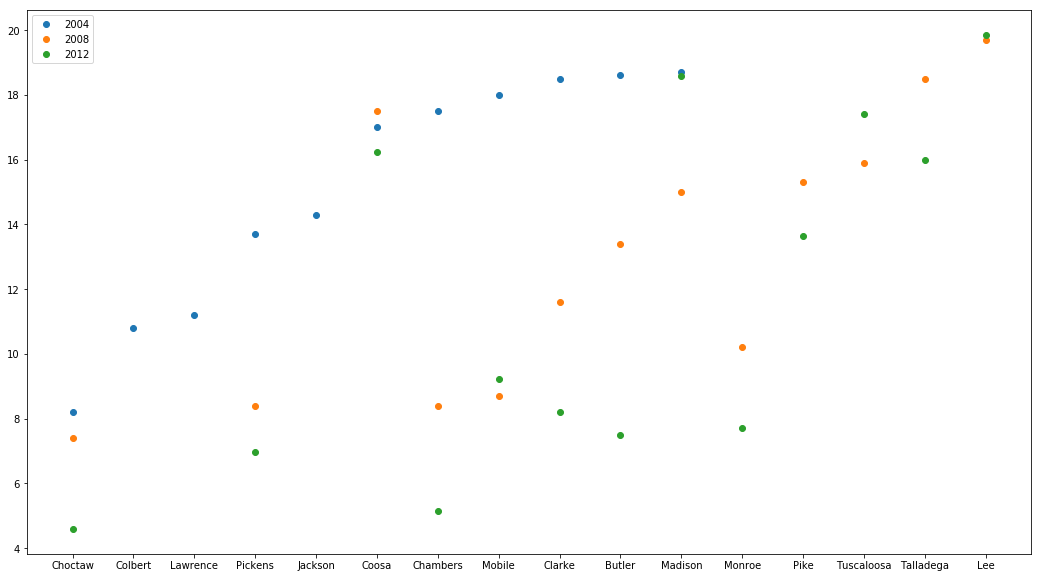

In [719]:

f, ax = plt.subplots(figsize=(18,10))
plt.plot(data_al_2004[data_al_2004.margin_winner_over_runnerup<20]['county'],
         data_al_2004[data_al_2004.margin_winner_over_runnerup<20]['margin_winner_over_runnerup'],'o',label='2004')

plt.plot(data_al_2008[data_al_2008.margin_winner_over_runnerup<20]['county'],
         data_al_2008[data_al_2008.margin_winner_over_runnerup<20]['margin_winner_over_runnerup'],'o',label='2008')

plt.plot(data_al_2012[data_al_2012.margin_winner_over_runnerup<20]['county'],
         data_al_2012[data_al_2012.margin_winner_over_runnerup<20]['margin_winner_over_runnerup'],'o',label='2012')


plt.legend()

<div class="alert alert-block alert-info">
-Lawrence and Colbert in 2008 and 2012 have a big margin.<br> 
-Choctaw and Pickens have a good chance to be chosen.
-Chambers has a better chance than Coosa due to Coosa in the three years has almost a fixed margin around 16 but Chambers in 2012 and 2008 has a very low margin which means that this county can be changed.<br> 
-The next three counties they are almost the same as Chambers.<br> 
    
So we will investigate on these counties: Choctaw, Pickens,Chambers, Mobile, Clarke, and Butler
</div>




#### Find the ave margin for each county in the three years

In [724]:
ave_margin_county={}
for i in data_al_2004.iterrows():
    if i[1][2] in ave_margin_county:
        ave_margin_county[i[1][2]].append(i[1][14])
    else:
        ave_margin_county[i[1][2]]=[i[1][14]]
        
for i in data_al_2008.iterrows():
    if i[1][2] in ave_margin_county:
        ave_margin_county[i[1][2]].append(i[1][14])
 
for i in data_al_2012.iterrows():
      if i[1][2] in ave_margin_county:
        ave_margin_county[i[1][2]].append(i[1][14])



In [725]:
import math
ave_margin_county2={}
for i in ave_margin_county:
    temp=sum(ave_margin_county[i])/3
    if temp<30:
         ave_margin_county2[i]=temp
            
ave_margin_county2 = sorted(ave_margin_county2.items(), key=operator.itemgetter(1))

#### Scatter plot for the counties with the ave margin in the three years


In [726]:
key_ave=[]
value_ave=[]
for i in (ave_margin_county2):
    key_ave.append(i[0])
    value_ave.append(i[1])

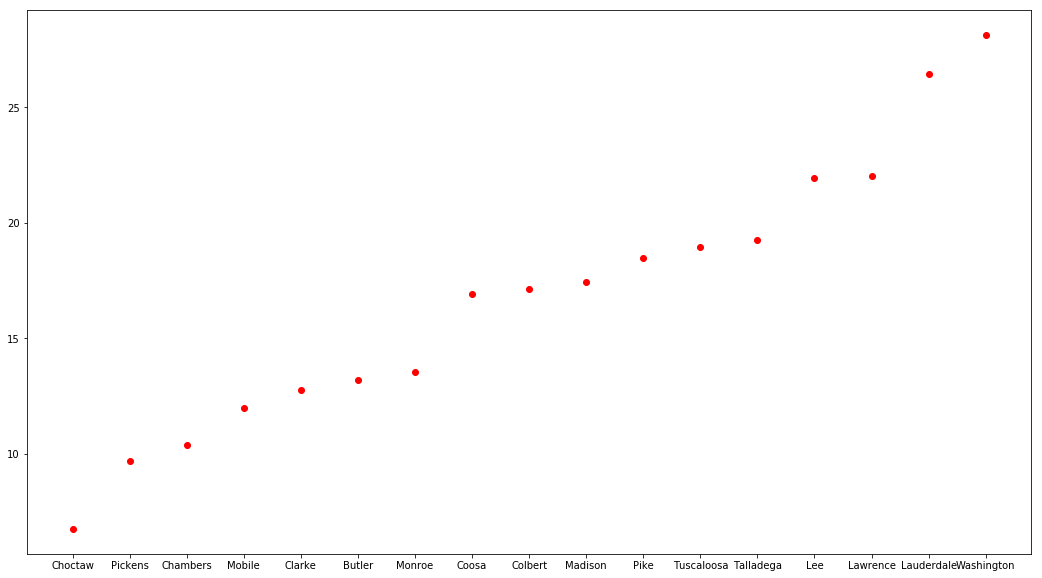

In [727]:
f, ax = plt.subplots(figsize=(18,10))
plt.plot(key_ave,value_ave,'o',color='red')

<div class="alert alert-block alert-info">
From the two previous graphs it clear that these are the swing counties: Choctaw, Chambers, Mobile,Pickens, Clarke, and Butler
</div>


#### Scatter plot for the swing counties and their total vote

In [785]:
total_vote=[]
county_name=key_ave[:6]
county_name.remove('Mobile')
for i in county_name:
    total_vote.append((data_al_2004[data_al_2004.county==i]['vote_total'].iloc[0]+
              data_al_2008[data_al_2008.county==i]['vote_total'].iloc[0]+
              data_al_2012[data_al_2012.county==i]['vote_total'].iloc[0])/3
         )
                       

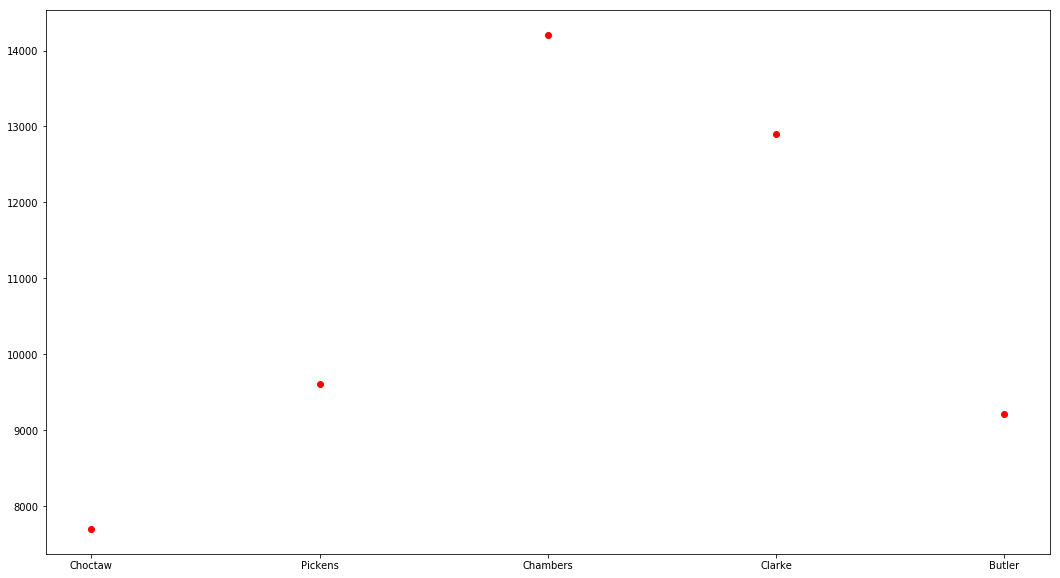

In [786]:
f, ax = plt.subplots(figsize=(18,10))
plt.plot(county_name,total_vote,'o',color='red')

<div class="alert alert-block alert-success">
Regarding to the previous graph, we did not add the Mobile county due to it has a large number of total-vote. In addition, depending on the total number of voting and the margin, the Mobile County and the Chambers County are the best county to effect on. Because they have large number of voting and they are considered as swing counties. On the other hand, if we want to pay attention just for the margin, Choctaw is the best choice. 
</div>
